In [1]:
import pandas as pd
import numpy as np

In [11]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
data.shape

(200, 5)

In [8]:
#dropping the unnecessary column
data.drop(columns = 'Unnamed: 0',inplace= True)
#checking again the data df
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
#checking duplicate
data.duplicated().sum()

0

In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Data Visualization**

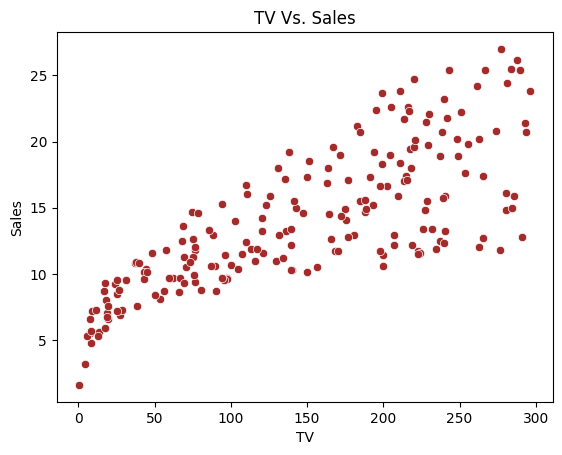

In [20]:
#making scatterplot for TV advertising vs. Sales
sns.scatterplot(x = 'TV', y = 'Sales', data = data, color = 'brown' )
plt.title ('TV Vs. Sales')
plt.show()

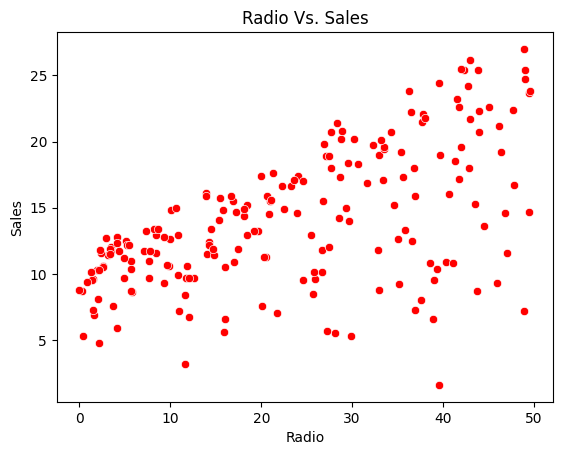

In [19]:
#making scatterplot for Radio advertising vs. Sales
sns.scatterplot(x = 'Radio', y =  'Sales', data = data,color = 'Red')
plt.title('Radio Vs. Sales')
plt.show()

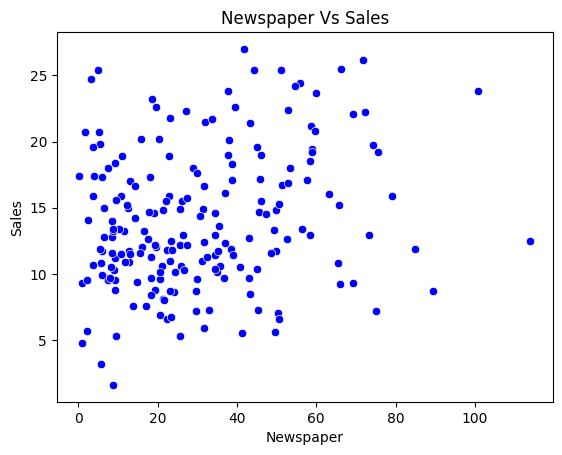

In [18]:
#making scatterplot for Newspaper advertising vs. Sales
sns.scatterplot(x = 'Newspaper', y = 'Sales',data = data, color= 'Blue')
plt.title ('Newspaper Vs Sales')
plt.show()

**Conclusion:**  From above scatterplt it is clear that variable  TV and Radio has linear positive relation with Sales.

**HEATMAP**

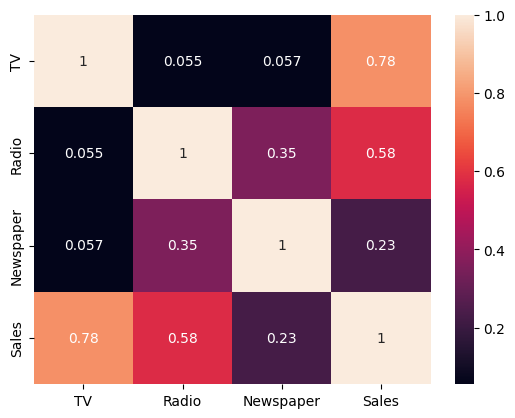

In [16]:
#Heatmap
corr = data.corr()
sns.heatmap(corr,annot = True)
plt.show()

**Conclusion:** Sales is highly correalted with TV and Radio where as least correalted with newspaper.

**BOXPLOT**

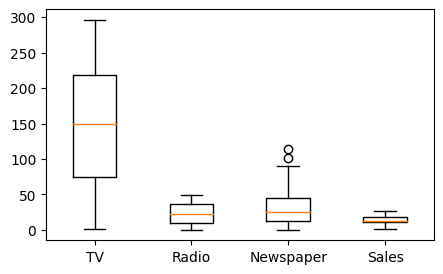

In [17]:
#Boxplot
plt.figure(figsize = [5,3])
plt.boxplot(data, vert = True,data = data,labels = data.columns)
plt.show()


**Conclusion:** Newspaper has some outliers but TV and radio has not any outliers

**Distribution of Budget Allocation**

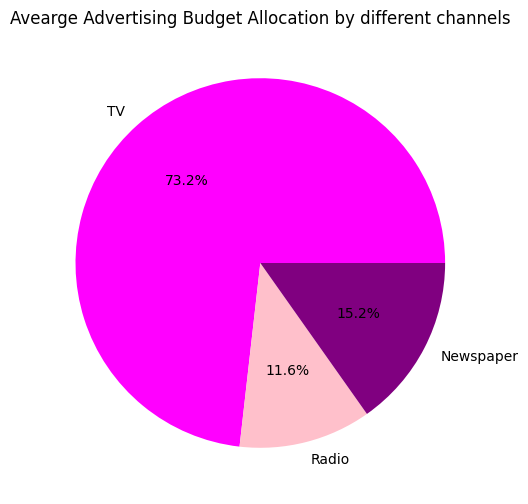

In [21]:
average_budget = data[['TV','Radio','Newspaper']].mean()
plt.figure(figsize=(8,6))
plt.pie(average_budget,labels = average_budget.index,autopct = '%1.1f%%',colors = ['Magenta','Pink','purple'])
plt.title('Avearge Advertising Budget Allocation by different channels')
plt.show()

**Conclusion:** From above pie chart among the 3 different channels the more budget is allocated with TV itself. In heatmap and also in scatterplot find a positive linear relationship between TV and Sales. As the budget for advertising with TV increases the sales also increases.

Splitting the dataset

In [22]:
# X is the feature variable
X = data.drop('Sales', axis=1)

In [23]:
# y is the target variable
y = data['Sales']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Standardizing**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['TV', 'Radio', 'Newspaper', 'Sales']
data[cols] = scaler.fit_transform(data[cols])
data.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


**Data Modellin**g

Model-1 Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [31]:
#predicting on test data
y_pred_linear = linear_model.predict(X_test)
y_pred_linear

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [32]:
pd.DataFrame({'Actual_y': y_test,'Predicted_y':y_pred_linear })

,Actual_y,Predicted_y
95,16.9,16.565396
15,22.4,21.188228
30,21.4,21.551071
158,7.3,10.889238
128,24.7,22.202320
115,12.6,13.355569
69,22.3,21.196925
170,8.4,7.350285
174,11.5,13.275471
45,14.9,15.124495


In [33]:
# calculating and output of the LR model
mse_linear = mean_squared_error(y_test,y_pred_linear)
r2_linear = r2_score(y_test,y_pred_linear)

print('Linear Regression MSE:', mse_linear)
print('Linear Regession R2:', r2_linear)

Linear Regression MSE: 3.79679723671522
Linear Regession R2: 0.8609466508230368


In [34]:
#checking sample output
output_lr = linear_model.predict([[180,50,40]])

In [35]:
output_lr

array([20.8792926])

In [36]:
output_lr[0]

20.879292598697646

<function matplotlib.pyplot.show(close=None, block=None)>

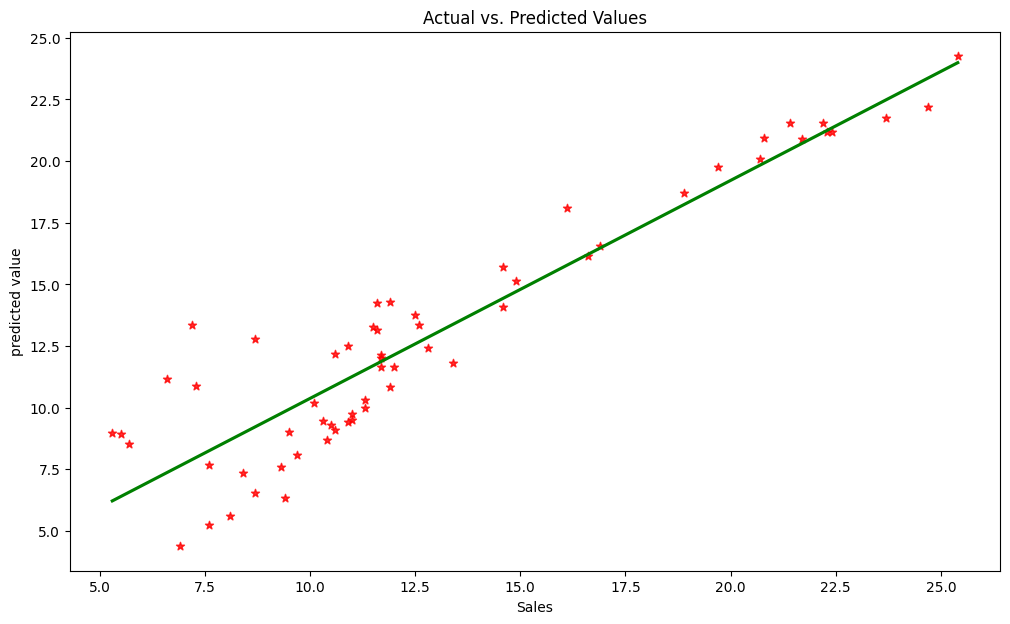

In [38]:
#Regression plot
plt.figure(figsize=(12,7))
plt.xlabel("Actual value")
plt.ylabel("predicted value")
plt.title('Actual vs. Predicted Values')
sns.regplot(x=y_test, y=y_pred_linear, ci=None, color='red', marker="*",line_kws={"color": "green"})
plt.show

**Model-2 DecisionTree**

In [39]:
#importing decsion tree libraries
from sklearn.tree import DecisionTreeRegressor

In [40]:
dt_reg = DecisionTreeRegressor(random_state = 42)
#training the model
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
y_dt_reg = dt_reg.predict(X_test)

In [43]:
pd.DataFrame({'Actual_y': y_test, 'Predicted_y': y_dt_reg})

,Actual_y,Predicted_y
95,16.9,19.0
15,22.4,23.8
30,21.4,18.9
158,7.3,5.6
128,24.7,23.8
115,12.6,15.3
69,22.3,22.6
170,8.4,10.1
174,11.5,12.0
45,14.9,16.6


In [44]:
#calcualting DT model performance
mse_dt_reg = mean_squared_error(y_test,y_dt_reg)
r2_dt_reg = r2_score(y_test,y_dt_reg)

print ('Decision Tree MSE : ', mse_dt_reg)
print('Decision Tree R2 :' , r2_dt_reg)


Decision Tree MSE :  1.5540000000000014
Decision Tree R2 : 0.9430865302651902


In [45]:
#sample Output
output_dt_reg = dt_reg.predict([[180,50,40]])
output_dt_reg[0]

21.2

<function matplotlib.pyplot.show(close=None, block=None)>

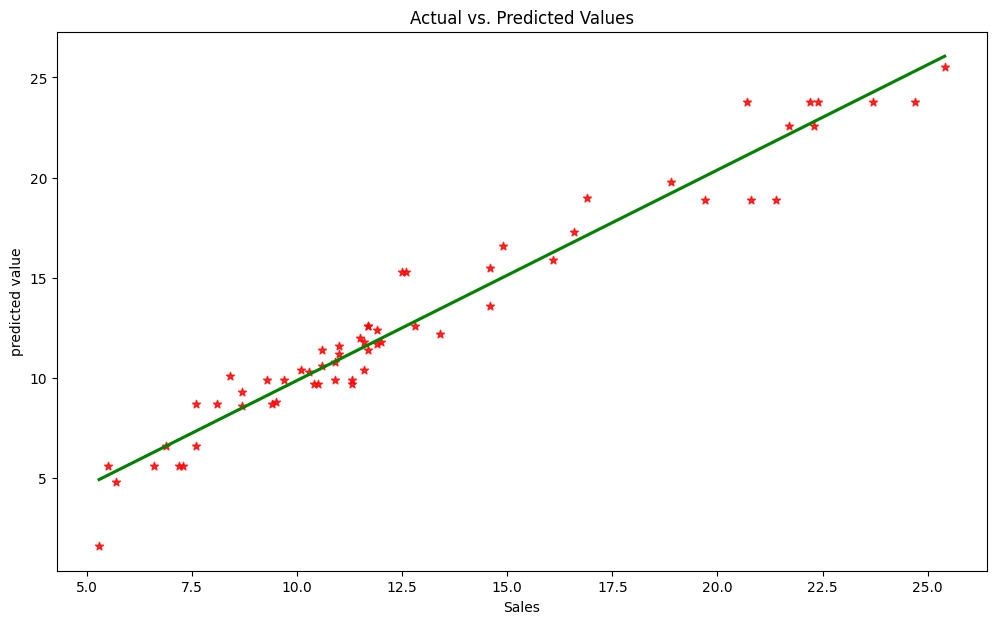

In [46]:
#decisiontreeplot

plt.figure(figsize=(12,7))
plt.xlabel("Actual value")
plt.ylabel("predicted value")
plt.title('Actual vs. Predicted Values')
sns.regplot(x=y_test, y=y_dt_reg, ci=None, color='red', marker="*",line_kws={"color": "green"})
plt.show

**Model-3 RandomForestRegressor**

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf_reg = RandomForestRegressor(random_state = 42)
#training the model
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [50]:
y_rf_reg = rf_reg.predict(X_test)

In [51]:
pd.DataFrame({'Actual_y': y_test, 'Predicted_y': y_rf_reg})

,Actual_y,Predicted_y
95,16.9,17.752
15,22.4,21.778
30,21.4,20.699
158,7.3,6.605
128,24.7,23.350
115,12.6,13.302
69,22.3,22.530
170,8.4,9.595
174,11.5,12.220
45,14.9,16.041


In [52]:
#calcualting DT model performance
mse_rf_reg = mean_squared_error(y_test,y_dt_reg)
r2_rf_reg = r2_score(y_test,y_dt_reg)

print ('RandomForestReg MSE : ', mse_rf_reg)
print('RandomForestReg R2 :' , r2_rf_reg)

RandomForestReg MSE :  1.5540000000000014
RandomForestReg R2 : 0.9430865302651902


<function matplotlib.pyplot.show(close=None, block=None)>

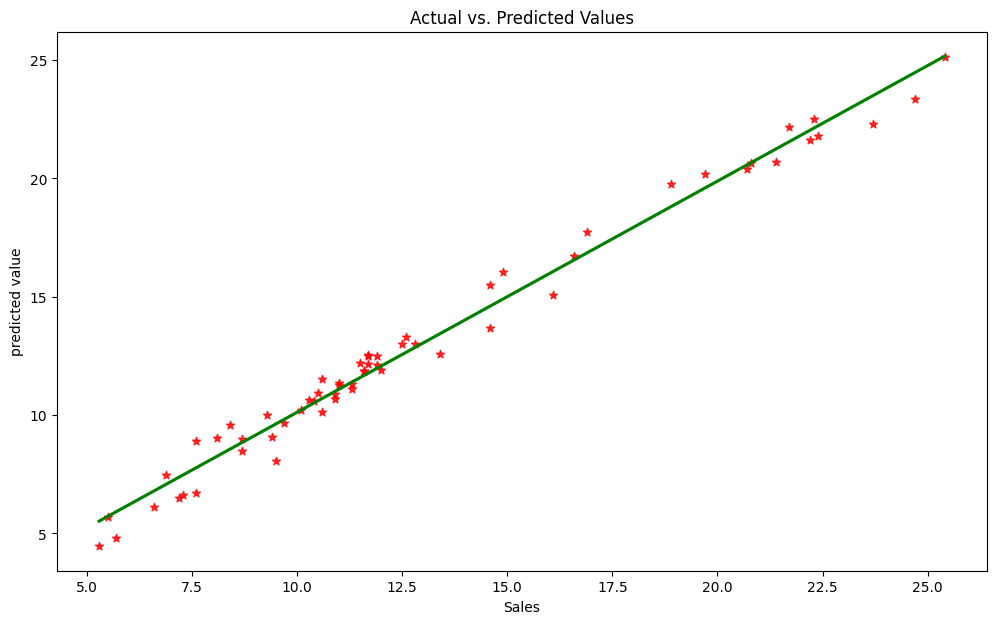

In [53]:
#RandomForestPlot
plt.figure(figsize=(12,7))
plt.xlabel("Actual value")
plt.ylabel("predicted value")
plt.title('Actual vs. Predicted Values')
sns.regplot(x=y_test, y=y_rf_reg, ci=None, color='red', marker="*",line_kws={"color": "green"})
plt.show

**Model-4 GradientBoostRegressor**

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)


GradientBoostingRegressor()

In [55]:
y_GBR = GBR.predict(X_test)

In [56]:
pd.DataFrame({'Actual_y': y_test, 'Predicted_y': y_GBR})

,Actual_y,Predicted_y
95,16.9,17.111775
15,22.4,21.895849
30,21.4,20.311498
158,7.3,6.182645
128,24.7,23.528555
115,12.6,12.969581
69,22.3,22.783311
170,8.4,9.344689
174,11.5,11.789579
45,14.9,15.902464


In [57]:
#calcualting DT model performance
mse_GBR = mean_squared_error(y_test,y_GBR)
r2_GBR = r2_score(y_test,y_GBR)

print ('GradintBoostRegressor MSE : ', mse_GBR)
print('GradientBoostRegressor R2 :' , r2_GBR)

GradintBoostRegressor MSE :  0.5353250182414562
GradientBoostRegressor R2 : 0.9803943344762087


<function matplotlib.pyplot.show(close=None, block=None)>

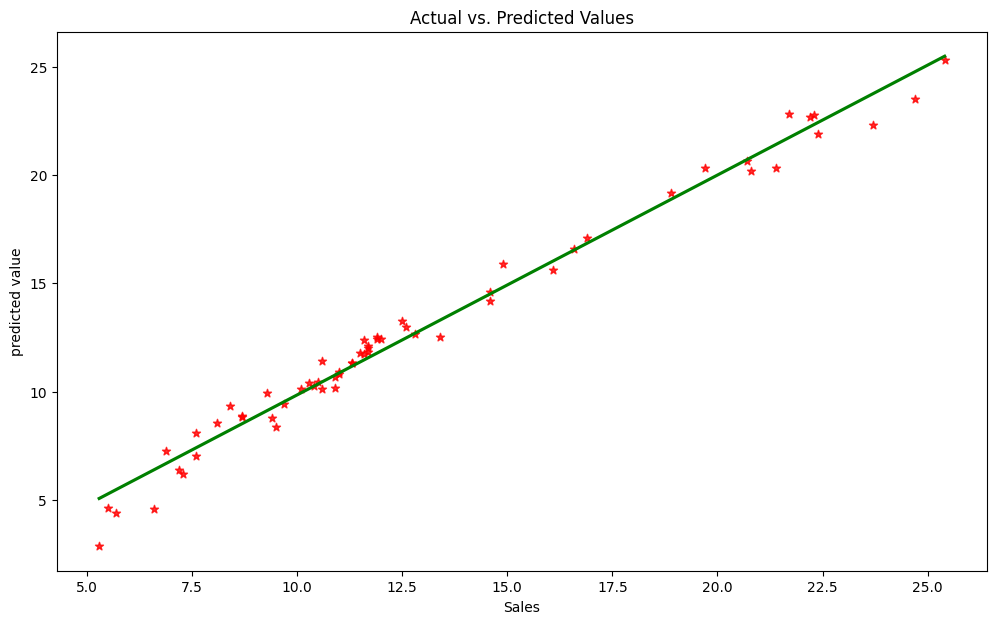

In [58]:
#GradientBoostRegressor
#RandomForestPlot
plt.figure(figsize=(12,7))
plt.xlabel("Actual value")
plt.ylabel("predicted value")
plt.title('Actual vs. Predicted Values')
sns.regplot(x=y_test, y=y_GBR, ci=None, color='red', marker="*",line_kws={"color": "green"})
plt.show

**Model Performance**

In [63]:
models = {
    'LinearRegression':LinearRegression(),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state = 42),
    'Random ForestRegressor' : RandomForestRegressor(random_state = 42),
    'GradientBoostingRegressor' : GradientBoostingRegressor()
    #GBR=GradientBoostingRegressor()
}

In [64]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,LinearRegression,2.479355,3.796797,0.905516,0.860947
1,DecisionTreeRegressor,0.000000,1.554000,1.000000,0.943087
2,Random ForestRegressor,0.108282,0.460882,0.995874,0.983121
3,GradientBoostingRegressor,0.025418,0.533475,0.999031,0.980462
